## Importing libraries

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read and Load the Dataset

In [158]:
columns=['target','ids','date','flag','user','text']
df = pd.read_csv('training.csv', encoding="ISO-8859-1", names=columns)
df.head(10)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


## Exploratory Data Analysis

### Columns in data

In [159]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

### Data Information

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


### checking Null entries

In [161]:
np.sum(df.isnull().any(axis=1))

0

### checking unique target values

In [162]:
df['target'].unique()

array([0, 4], dtype=int64)

## Data visualization of Target Variables

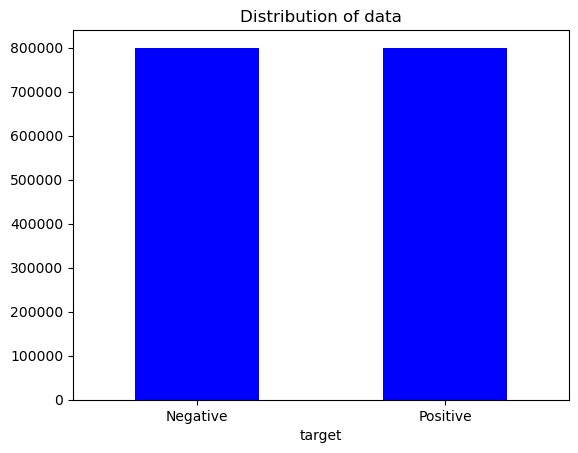

In [163]:
ax = df.groupby('target').count().plot(kind='bar', color="blue", title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

text, sentiment = list(df['text']), list(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

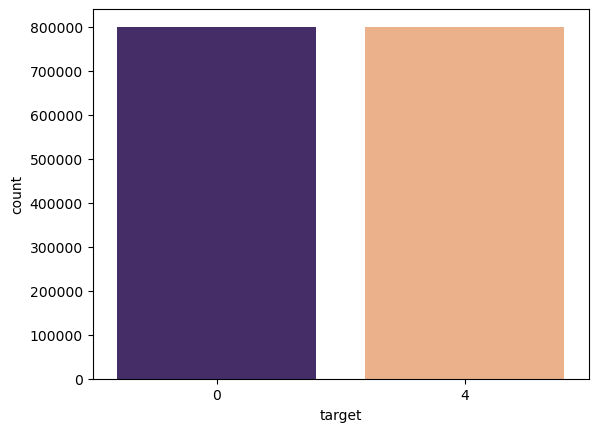

In [164]:
import seaborn as sns
sns.countplot(x='target', data=df, palette=['#432371',"#FAAE7B"])

## Data Preprocessing

### Selecting the text and Target column for our further analysis

In [165]:
data=df[['text','target']]
data['target'] = data['target'].replace(4,1)
data['target'].unique()

C:\Users\hp\AppData\Local\Temp\ipykernel_3728\1149025266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


array([0, 1], dtype=int64)

In [166]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [167]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [168]:
dataset = pd.concat([data_pos, data_neg])
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail(10)

19990    @typie i think i am going to seek out more thi...
19991                    @rogerthatv2 not looking hopeful 
19992    @2hood4hollywood i know  i'm sorry...i got cau...
19993    it's so warm today! and my external hard drive...
19994    i am stuck in the city y is the holland tunnel...
19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

### Importing Stopwords from nltk

In [169]:
from nltk.corpus import stopwords
stopwordlist = stopwords.words("english")

### Cleaning and removing the above stop words list from the tweet text

In [170]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

### Cleaning and removing punctuations

In [171]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    much time weekend work trip malmï¿½ frisat tod...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999     threw sign donnie bent get thingee made sad face
Name: text, dtype: object

### Cleaning and removing repeating characters

In [172]:
import re

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    much time weekend work trip malmï¿½ frisat tod...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999     threw sign donnie bent get thingee made sad face
Name: text, dtype: object

### Cleaning and removing URLs

In [173]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(http://[^s]+)|(https://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    much time weekend work trip malmï¿½ frisat tod...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999     threw sign donnie bent get thingee made sad face
Name: text, dtype: object

### Cleaning and removing numeric numbers

In [174]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    much time weekend work trip malmï¿½ frisat tod...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999     threw sign donnie bent get thingee made sad face
Name: text, dtype: object

### Getting tokenization of tweet text

In [175]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+|$[0-9]+|\S+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

### Applying stemming

In [176]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

### Separating input feature and label

In [177]:
X=data.text
y=data.target

### Plot a cloud of words for negative tweets

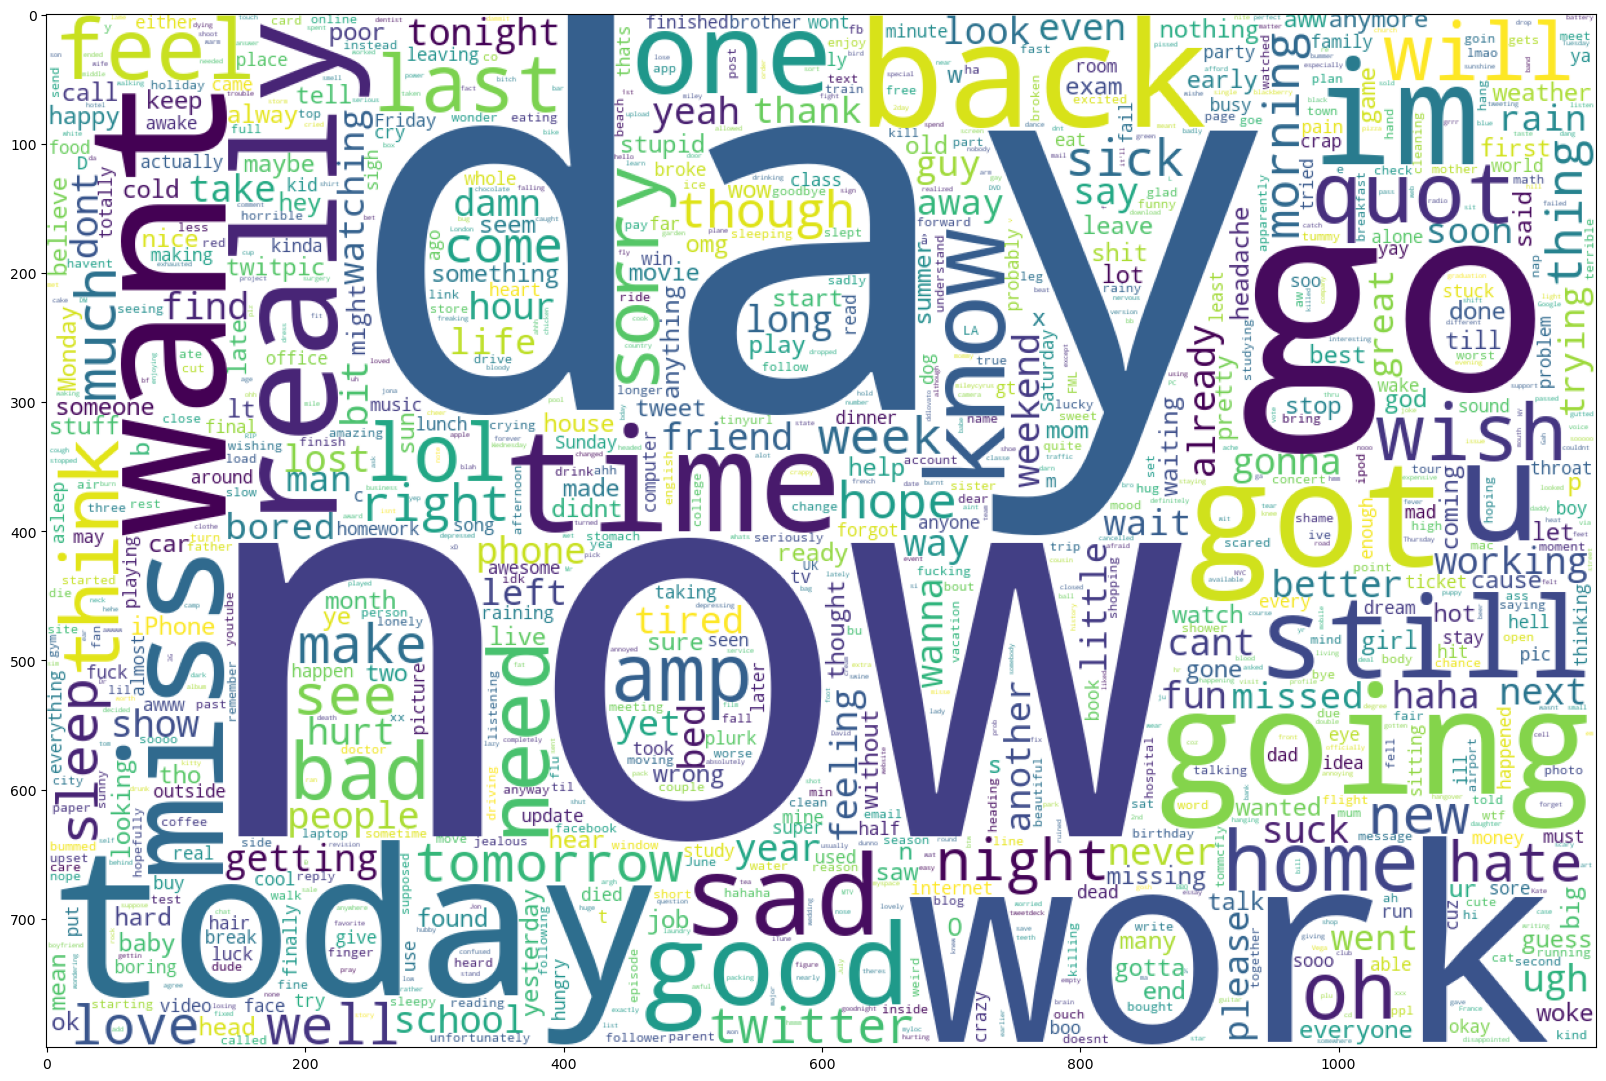

In [178]:
from wordcloud import WordCloud

data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , background_color='white', width = 1200 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

### Plot a cloud of words for positive tweets

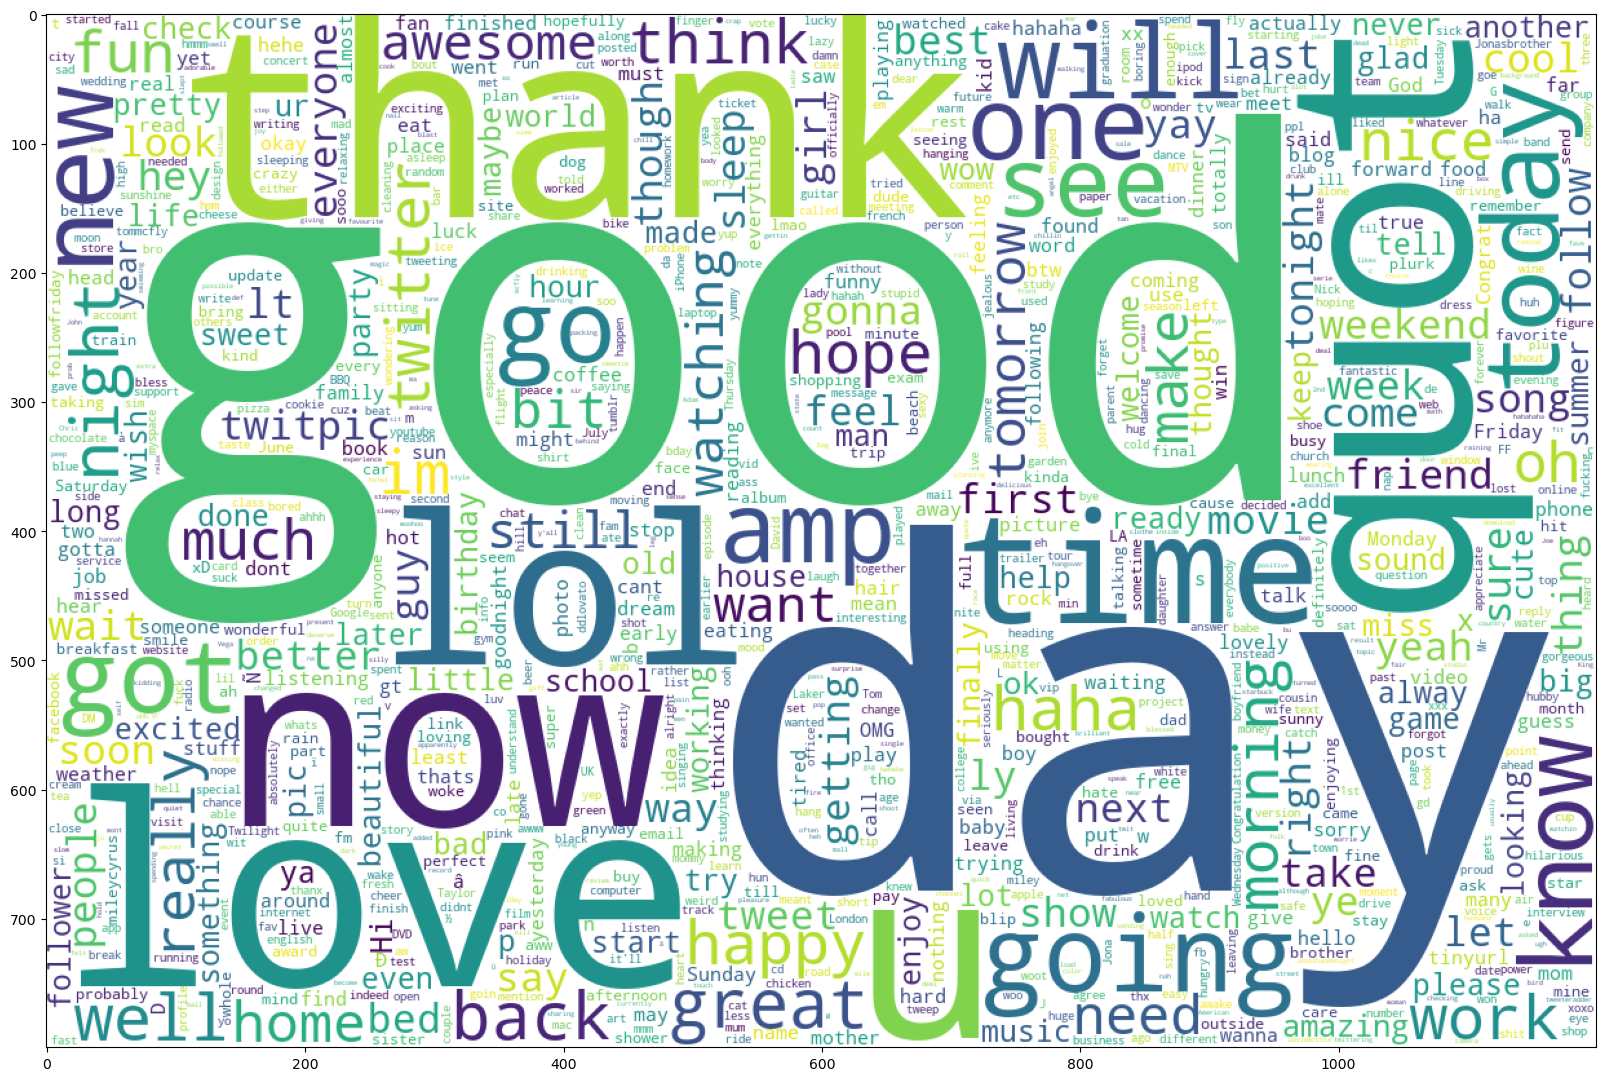

In [179]:
data_pos = data['text'][800000:]
wc = WordCloud(background_color='white',max_words = 1000 , width = 1200 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

### Making a frequency distribution of words


In [180]:
all_terms=[]

# Traversing in till the length of the input list of lists
for m in range(len(dataset['text'].values)):

   # using nested for loop, traversing the inner lists
   for n in range (len(dataset['text'].values[m])):

      # Add each element to the result list
      all_terms.append(dataset['text'].values[m][n])

# printing the resultant list after joining the list of lists
len(all_terms)

311299

In [181]:
all_terms[:20]

['love',
 'healthuandpets',
 'u',
 'guys',
 'r',
 'best',
 'im',
 'meeting',
 'one',
 'besties',
 'tonight',
 'cant',
 'wait',
 'girl',
 'talk',
 'darealsunisakim',
 'thanks',
 'twitter',
 'add',
 'sunisa']

In [182]:
from nltk.probability import FreqDist

In [183]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'im': 4223, 'good': 2285, 'day': 2177, 'get': 2010, 'like': 1918, 'go': 1810, 'work': 1767, 'going': 1755, 'today': 1750, 'cant': 1534, ...})

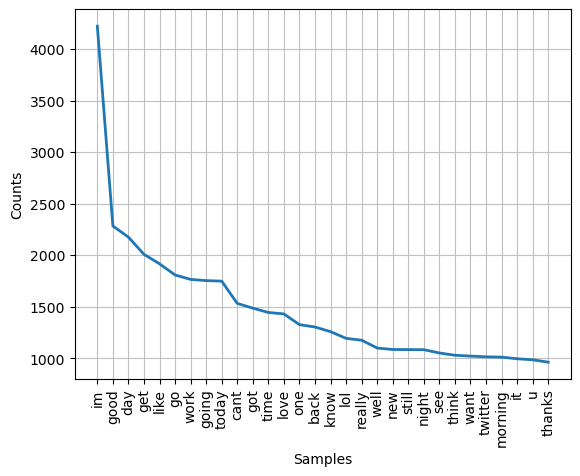

In [184]:
fdist.plot(30,cumulative=False)
plt.show()

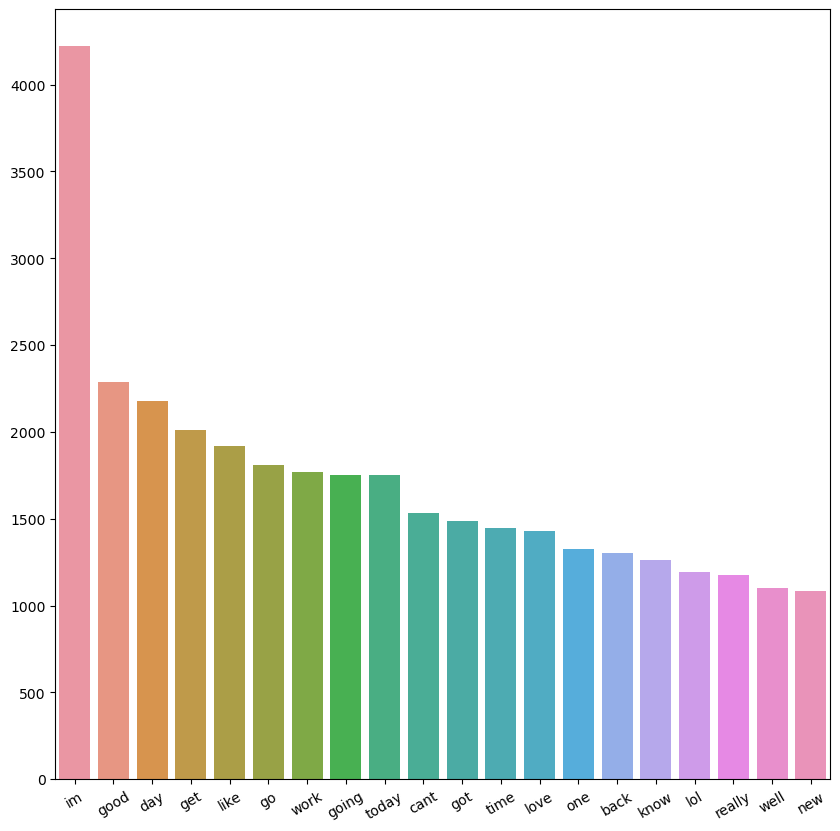

In [185]:
all_fdist = fdist.most_common(20)
all_fdist = pd.Series(dict(all_fdist))
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

## Sentiment Classification using VADER


In [200]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [201]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [204]:
data=df[['text','target']]
data['target'] = data['target'].replace(4,1)
data['target'].unique()

C:\Users\hp\AppData\Local\Temp\ipykernel_3728\1149025266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


array([0, 1], dtype=int64)

In [206]:
data_pos_vader = data[data['target'] == 1]
data_neg_vader = data[data['target'] == 0]

In [207]:
data_pos_vader = data_pos_vader.iloc[:int(20000)]
data_neg = data_neg_vader.iloc[:int(20000)]

In [208]:
dataset_vader = pd.concat([data_pos_vader, data_neg_vader])
dataset_vader['text']=dataset_vader['text'].str.lower()
dataset_vader['text'].head

<bound method NDFrame.head of 800000         i love @health4uandpets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @darealsunisakim thanks for the twitter add, s...
800003    being sick can be really cheap when it hurts t...
800004      @lovesbrooklyn2 he has that effect on everyone 
                                ...                        
799995    sick  spending my day laying in bed listening ...
799996                                      gmail is down? 
799997                        rest in peace farrah! so sad 
799998    @eric_urbane sounds like a rival is flagging y...
799999    has to resit exams over summer...  wishes he w...
Name: text, Length: 820000, dtype: object>

In [211]:
dataset_vader['score_vader'] = dataset_vader.text.apply(get_vader_sentiment)

In [212]:
dataset_vader

,text,target,score_vader
800000,i love @health4uandpets u guys r the best!!,1,0.8745
800001,im meeting up with one of my besties tonight! ...,1,0.0000
800002,"@darealsunisakim thanks for the twitter add, s...",1,0.8172
800003,being sick can be really cheap when it hurts t...,1,-0.5106
800004,@lovesbrooklyn2 he has that effect on everyone,1,0.0000
...,...,...,...
799995,sick spending my day laying in bed listening ...,0,-0.5106
799996,gmail is down?,0,0.0000
799997,rest in peace farrah! so sad,0,0.1025
799998,@eric_urbane sounds like a rival is flagging y...,0,0.3612


In [214]:
dataset_vader['sent_prediction_vader'] =dataset_vader.score_vader.apply(lambda x:1 if x>0.1 else 0)

In [215]:
dataset_vader

,text,target,score_vader,sent_prediction_vader
800000,i love @health4uandpets u guys r the best!!,1,0.8745,1
800001,im meeting up with one of my besties tonight! ...,1,0.0000,0
800002,"@darealsunisakim thanks for the twitter add, s...",1,0.8172,1
800003,being sick can be really cheap when it hurts t...,1,-0.5106,0
800004,@lovesbrooklyn2 he has that effect on everyone,1,0.0000,0
...,...,...,...,...
799995,sick spending my day laying in bed listening ...,0,-0.5106,0
799996,gmail is down?,0,0.0000,0
799997,rest in peace farrah! so sad,0,0.1025,1
799998,@eric_urbane sounds like a rival is flagging y...,0,0.3612,1


In [219]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [220]:
accuracy_score(dataset_vader.target,dataset_vader.sent_prediction_vader)

0.6997780487804878

In [231]:
cf_matrix=confusion_matrix(dataset_vader.target,dataset_vader.sent_prediction_vader)
cf_matrix

array([[561795, 238205],
       [  7977,  12023]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

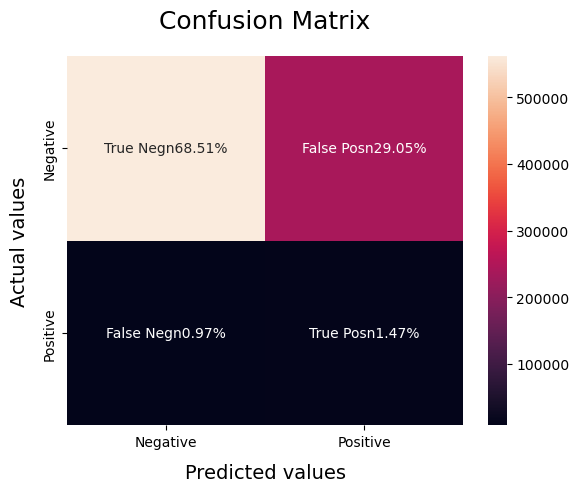

In [233]:
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels,fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## Importing libraries and Splitting Our Data Into Train and Test Subsets

In [186]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

## Transforming the Dataset Using TF-IDF Vectorizer

### Fit the TF-IDF Vectorizer

In [187]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  500000


### Transform the data using TF-IDF Vectorizer

In [188]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

## Function for Model Evaluation

In [189]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels,fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## Model Building

### Model-1 using SVC

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



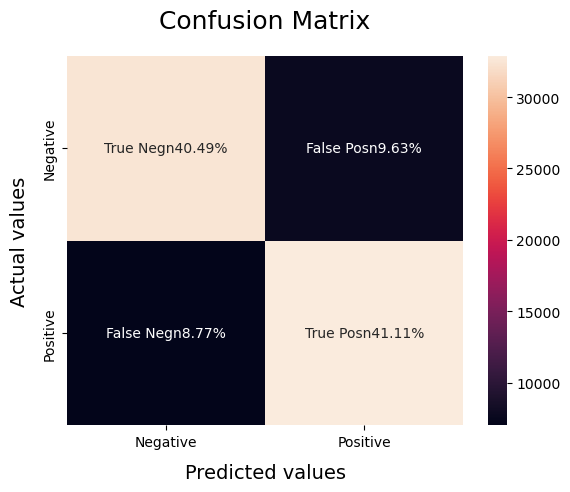

In [190]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

### Model-2 using Logistic Regression

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



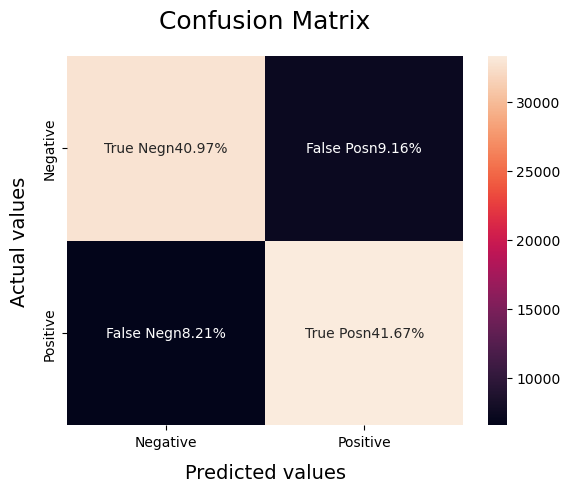

In [191]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)